# Clothing Material and Heat Transfer

Kristtiya Guerra and Audrey Lee

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Question: 
### What is the best clothing combination to conserve heat loss during the average winter temperature in Boston?
We wanted to determine which clothing combinations were best to wear during the average winter temperature in Boston. We did not want to approach the model by only comparing clothing designed for the cold. We wanted to experiment with varying clothing combinatinations. 

A study was done in the late 70s through early 80s and became published in the early 90s. It calculated the col values of different clothing articles based on categories such as shirt, trouser, socks, and dresses. 

Our model and question went through a few iterations. Initially we were going to make the approach of looking at the insulation of individual materials used in clothing, however, we deemed that model as trivial compared to using the different clothing combinations and the surface area they covered. 

## Model: Clothing Combinations and Heat Loss


`State` objects were set for the initial temperature of the human body (in Kelvin): the heat loss (which is initially 0), the r-values and the surface areas of each clothing piece. We made multiple states to represent the varying clothing styles. 
The units were also implemented in this portion. They were added individually in each state object.

The r-values were calculated by taking the col values and dividing them by 1.136 (the official conversion factor). The area values of the clothing articles were multiplied by 1.6 as those were percentages and in this model we set our human surface area to 1.6 m^2 which was the average surface area of a human body. The rHuman value of .003874 was found off of a study and converted to the units of the r-value.

In [2]:
#Establishing units
Meter = UNITS.meter
Watt = UNITS.watt
Second = UNITS.second
Kelvin = UNITS.kelvin
Celsius = UNITS.celsius
Joules = UNITS.joules
RUnit = Kelvin * Meter * Meter / Watt
ASqr = Meter * Meter

#Creating the surface area of a human
HumanArea = 1.6 * ASqr 
#Creating the average human body temperature
HumanTemp = (37 + 273.15) * Kelvin 

#### Creating State Objects for each clothing combination ####

WinterInit = State(HumanTemp=HumanTemp, Q = 0*Watt,  
                   top =0.41/1.136 * RUnit, bottom=0.21/1.136 * RUnit, socks=0.04/1.136 * RUnit, rHuman=.003874*RUnit,
                   Atop=1.6*.47*ASqr, Abottom=1.6*.45*ASqr, Asocks=1.6*.07*ASqr)

SummerInit = State(HumanTemp=HumanTemp, Q = 0*Watt, 
                   top =0.07/1.136* RUnit, bottom=0.09/1.136* RUnit, socks=0.03/1.136* RUnit, rHuman=.003874* RUnit,
                   Atop=1.6*.12*ASqr, Abottom=1.6*.18*ASqr, Asocks=1.6*.05*ASqr)

LoungeInit = State(HumanTemp=HumanTemp, Q = 0*Watt, 
                   top =0.38/1.136* RUnit, bottom=0.34/1.136* RUnit, socks=0.03/1.136* RUnit, rHuman=.003874* RUnit,
                   Atop=1.6*.45*ASqr, Abottom=1.6*.44*ASqr, Asocks=1.6*.07*ASqr)

DressInit = State(HumanTemp=HumanTemp, Q = 0*Watt, 
                   top =0.83/1.136* RUnit, bottom=0.59/1.136* RUnit, socks=0.02/1.136* RUnit, rHuman=.003874* RUnit,
                   Atop=1.6*.40*ASqr, Abottom=1.6*.19*ASqr, Asocks=1.6*.35*ASqr)

SleeperInit = State(HumanTemp=HumanTemp, Q = 0*Watt, 
                   top =0.92/1.136* RUnit, bottom=1* RUnit, socks=1* RUnit, rHuman=.003874* RUnit,
                   Atop=1.6*.86*ASqr, Abottom=1.6*0*ASqr, Asocks=1.6*0*ASqr);

The state values below represent as followed:
HumanTemp represents the intital average human body temperature in Kelvin.
Q represents the intial heat loss in Watts. It is 0 because at the beginning there is no heat loss.
top, bottom, socks, and rhuman represent the r values for the respective clothing articles.
Atop, Abottom, Asocks represents the surface area coverage of the clothing articles.

#### Winter Clothing Combination

In [3]:
#these five cells display the input state variables
WinterInit

,values
HumanTemp,310.15 kelvin
Q,0 watt
top,0.3609154929577465 kelvin * meter ** 2 / watt
bottom,0.18485915492957747 kelvin * meter ** 2 / watt
socks,0.035211267605633804 kelvin * meter ** 2 / watt
rHuman,0.003874 kelvin * meter ** 2 / watt
Atop,0.752 meter ** 2
Abottom,0.7200000000000001 meter ** 2
Asocks,0.11200000000000002 meter ** 2


#### Summer Clothing Combination

In [4]:
SummerInit

,values
HumanTemp,310.15 kelvin
Q,0 watt
top,0.06161971830985916 kelvin * meter ** 2 / watt
bottom,0.07922535211267606 kelvin * meter ** 2 / watt
socks,0.026408450704225355 kelvin * meter ** 2 / watt
rHuman,0.003874 kelvin * meter ** 2 / watt
Atop,0.192 meter ** 2
Abottom,0.288 meter ** 2
Asocks,0.08000000000000002 meter ** 2


#### Lounge Clothing Combination

In [5]:
LoungeInit

,values
HumanTemp,310.15 kelvin
Q,0 watt
top,0.3345070422535212 kelvin * meter ** 2 / watt
bottom,0.29929577464788737 kelvin * meter ** 2 / watt
socks,0.026408450704225355 kelvin * meter ** 2 / watt
rHuman,0.003874 kelvin * meter ** 2 / watt
Atop,0.7200000000000001 meter ** 2
Abottom,0.7040000000000001 meter ** 2
Asocks,0.11200000000000002 meter ** 2


#### Dress Clothing Combination

In [6]:
DressInit

,values
HumanTemp,310.15 kelvin
Q,0 watt
top,0.7306338028169015 kelvin * meter ** 2 / watt
bottom,0.5193661971830986 kelvin * meter ** 2 / watt
socks,0.017605633802816902 kelvin * meter ** 2 / watt
rHuman,0.003874 kelvin * meter ** 2 / watt
Atop,0.6400000000000001 meter ** 2
Abottom,0.30400000000000005 meter ** 2
Asocks,0.5599999999999999 meter ** 2


#### Sleeper Clothing Combination

In [7]:
SleeperInit

,values
HumanTemp,310.15 kelvin
Q,0 watt
top,0.8098591549295776 kelvin * meter ** 2 / watt
bottom,1 kelvin * meter ** 2 / watt
socks,1 kelvin * meter ** 2 / watt
rHuman,0.003874 kelvin * meter ** 2 / watt
Atop,1.3760000000000001 meter ** 2
Abottom,0.0 meter ** 2
Asocks,0.0 meter ** 2


Put a `System` object to contain the system parameters. The state object values for the clothing combinations are also implemented into the system object, as they also become a system containing the heat loss. We also set the temperature of the outside, choosing 5 degrees Celsius as the temperature of the environment since that is the center point of Boston's average high and low temperature in the winter.

For the time range, we chose 30 minutes, but it can be replaced with any number if wanted.

In [8]:
#sets system to the variable "human"
human = System(WinterInit=WinterInit, 
               SummerInit=SummerInit,
               LoungeInit=LoungeInit,
               DressInit=DressInit,
               SleeperInit=SleeperInit,
               T_env= (5+273.15) * Kelvin,
               t_end=30,
               dt=1)

,values
WinterInit,HumanTemp ...
SummerInit,HumanTemp ...
LoungeInit,HumanTemp ...
DressInit,HumanTemp ...
SleeperInit,HumanTemp 3...
T_env,278.15 kelvin
t_end,30
dt,1


The update function below, titled as `Clothes`, gathers the state values from the clothing combination systems, runs the equation, and then returns the ` State ` values. The equation is an interpretation that came from the study mentioned before. It takes the surface area covered by the clothing multiplied by the difference in the temperature outside compared to the human body temperature, and divided by the r-value of the clothing. The equation is then multiplied by time to represent the loss of heat energy over time.

In [9]:
def Clothes(state, t, system):
    """Update the thermal transfer model.
    
    state: State (r-values, areaCovered)
    t: time
    system: System object
    
    returns: State (r-values, areaCovered)
    """
    unpack(system)
    
    HumanTemp, Q, top, bottom, socks, rHuman, Atop, Abottom, Asocks = state
    T_delta = HumanTemp-T_env
    dQdt = ((Atop * (T_delta)/top) + (Abottom * (T_delta)/bottom) + (Asocks * (T_delta)/socks)
                  + (((1.6 * ASqr)-(Atop+Abottom+Asocks)) * T_delta/rHuman))
    Q += dQdt *dt

    return State(HumanTemp=HumanTemp, Q=Q, 
                 top=top, bottom=bottom, socks=socks, rHuman=rHuman, Atop=Atop, Abottom=Abottom, Asocks=Asocks)

Our `run_simulation` function works by running the above mentioned equation and sweeping through the different
clothing combinations and their parameters for each time step. 

In [10]:
def run_simulation(system, Clothes):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=WinterInit.index)
    frame2 = TimeFrame(columns=SummerInit.index)
    frame3=TimeFrame(columns=LoungeInit.index)
    frame4=TimeFrame(columns=DressInit.index)
    frame5=TimeFrame(columns=SleeperInit.index)
    
    frame.row[0] = WinterInit
    frame2.row[0] = SummerInit
    frame3.row[0] = LoungeInit
    frame4.row[0] = DressInit
    frame5.row[0] = SleeperInit
    
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = Clothes(frame.row[t], t, system)
        frame2.row[t+dt] = Clothes(frame2.row[t],t,system)
        frame3.row[t+dt] = Clothes(frame3.row[t],t,system)
        frame4.row[t+dt] = Clothes(frame4.row[t],t,system)
        frame5.row[t+dt] = Clothes(frame5.row[t],t,system)
        
    # store the final temperature in T_final for each clothing combination
    system.T_final = get_last_value(frame.Q)
    system.T_final2 = get_last_value(frame2.Q)
    system.T_final3 = get_last_value(frame3.Q)
    system.T_final4 = get_last_value(frame4.Q)
    system.T_final5 = get_last_value(frame5.Q)
    
    return frame, frame2, frame3, frame4, frame5

In [11]:
#sets the returned values to the variable results
results = run_simulation(human, Clothes);

## Results 1: Heat Loss of Each Clothing Combination

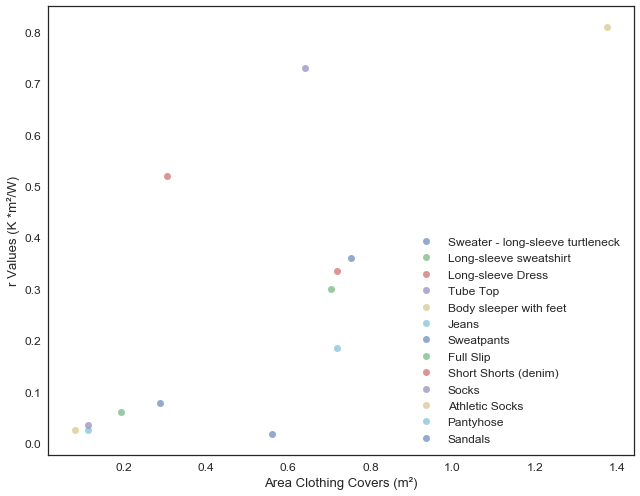

In [12]:
'''Creates an array (and empties the array for each section: top, bottom, and socks) for both the r values 
and the area covered of each individual clothing material and plots them'''
plt.figure(figsize=(9,7))
RValue = []
SurfaceCoverage = []
for tClothing in range(0,5):    
    RValue +=  [results[tClothing].top[0]]
    SurfaceCoverage +=    [results[tClothing].Atop[0]]
plot(SurfaceCoverage[0], RValue[0], 'o', label='Sweater - long-sleeve turtleneck ')
plot(SurfaceCoverage[1], RValue[1], 'o', label='Long-sleeve sweatshirt')
plot(SurfaceCoverage[2], RValue[2], 'o', label='Long-sleeve Dress')
plot(SurfaceCoverage[3], RValue[3], 'o', label='Tube Top')
plot(SurfaceCoverage[4], RValue[4], 'o', label='Body sleeper with feet')
RValue = []
SurfaceCoverage = []
for tClothing in range(0,5):    
    RValue +=  [results[tClothing].bottom[0]]
    SurfaceCoverage +=    [results[tClothing].Abottom[0]]
plot(SurfaceCoverage[0], RValue[0], 'o', label='Jeans')
plot(SurfaceCoverage[1], RValue[1], 'o', label='Sweatpants')
plot(SurfaceCoverage[2], RValue[2], 'o', label ='Full Slip')
plot(SurfaceCoverage[3], RValue[3], 'o', label='Short Shorts (denim)')
RValue = []
SurfaceCoverage = []
for tClothing in range(0,5):    
    RValue +=  [results[tClothing].socks[0]]
    SurfaceCoverage +=    [results[tClothing].Asocks[0]]
plot(SurfaceCoverage[0], RValue[0], 'o', label='Socks')
plot(SurfaceCoverage[1], RValue[1], 'o', label='Athletic Socks')
plot(SurfaceCoverage[2], RValue[2], 'o', label='Pantyhose')
plot(SurfaceCoverage[3], RValue[3], 'o', label='Sandals')
decorate(xlabel='Area Clothing Covers (m²)',
        ylabel='r Values (K *m²/W)')

#### Figure 1

This figure plots the r values vs. the surface area covered of each clothing we used in the clothing combinations. This plot was used as a reference.

## Results 2:  Surface Area of Clothing Coverage versus r Values

### R Value versus Area Clothing Coverage

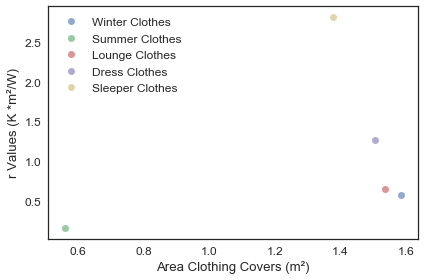

In [13]:
#Creates arrays for the known r values and area covered of each clothing combination and plots them
rValueResult = []
AreaResult = []
for tClothing in range(0,5):    
    rValueResult += [results[tClothing].top[0] + results[tClothing].bottom[0] + results[tClothing].socks[0]]
    AreaResult += [results[tClothing].Atop[0] + results[tClothing].Abottom[0] + results[tClothing].Asocks[0]]
plot(AreaResult[0], rValueResult[0], 'o', label='Winter Clothes')
plot(AreaResult[1], rValueResult[1], 'o', label='Summer Clothes')
plot(AreaResult[2], rValueResult[2], 'o', label='Lounge Clothes')
plot(AreaResult[3], rValueResult[3], 'o', label='Dress Clothes')
plot(AreaResult[4], rValueResult[4], 'o', label='Sleeper Clothes')
decorate(xlabel='Area Clothing Covers (m²)',
        ylabel='r Values (K *m²/W)')

##### Figure 2

The figure shows the total r-value of the clothing combinations compared to the total surface area of coverage by the outfits. In comparison with Figure 3 (next section), based on the results in Figure 2, it can be concluded that while the r-value of each clothing material is significant in affecting the clothing insulation, the most important factor for determining the amounts of heat lost is the surface area coverage.

This model works at showing r-values with respect to the surface area coverage, however, it only shows the data we already know rather than come up with some sort of average. The method of finding an average does not exist, so there is no way to verify if it could give significant information.

## Results 3: Heat Loss over Time

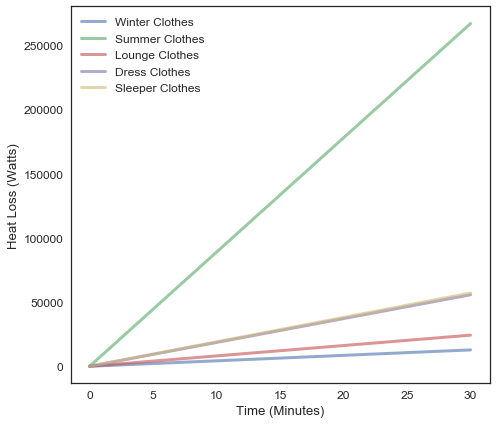

In [14]:
#Plots all of the results of each clothing combination as heat loss vs. time
plt.figure(figsize=(7,6))
plot(results[0].Q, label='Winter Clothes')
plot(results[1].Q, label='Summer Clothes')
plot(results[2].Q, label='Lounge Clothes')
plot(results[3].Q, label='Dress Clothes')
plot(results[4].Q, label='Sleeper Clothes')

decorate(xlabel='Time (Minutes)',
         ylabel='Heat Loss (Watts)')

#### Figure 3

The figure above shows the comparison of heat loss over time of different clothing types. Based on the results, it can be concluded that winter clothes (long-sleeve turtleneck sweater, denim pants, and dress socks) is the most efficient to wear in the winter temperatures, however, an alternative could also be lounge gear (sweatshirt, sweatpants, and athletic socks). The lounge gear has a similar heat loss trend as the winter clothing.

### The results below show the total final heat loss in watts of each simulated person wearing their respected clothing combinations.

In [15]:
#Final heat loss of the Winter Clothing
human.T_final 

<Quantity(12757.771657525658, 'watt')>

In [16]:
#Final heat loss of the Summer Clothing
human.T_final2

<Quantity(267107.3230910833, 'watt')>

In [17]:
# Final heat loss of the Lounge Clothing
human.T_final3

<Quantity(24255.425581354426, 'watt')>

In [18]:
# Final heat loss of the Dress Clothing
human.T_final4 

<Quantity(55727.874393375445, 'watt')>

In [19]:
# Final heat loss of the Sleeper
human.T_final5 

<Quantity(57139.616762092905, 'watt')>

The data above shows the final amount of heat loss that occured at the end of the 30 minutes for each outfit.

### Heat Loss of Dress Clothing Compared to Heat Loss of Sleeper Clothing


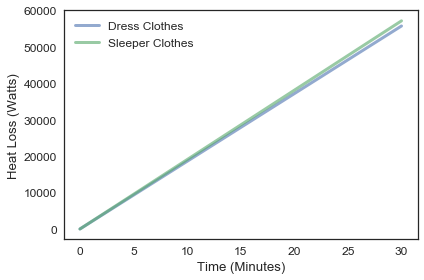

In [20]:
#Plots the heat loss of the dress and sleeper clothing combination
plt.figure(figsize=(6,4))
plot(results[3].Q, label='Dress Clothes')
plot(results[4].Q, label='Sleeper Clothes')
decorate(xlabel='Time (Minutes)',
         ylabel='Heat Loss (Watts)')

#### Figure 4

The figure above plots the heat loss of the dress clothes and the sleeper clothes. We plotted them individually here just so we could see the differences between their trends as both were very similar. The dress clothes appear to have less heat loss comapred to the sleeper outfit, which infers that it is much better to wear a dress outside compared to a full-body sleeper.

## Interpretation

This model has its limitations. The model works well at showing the trend of heat loss over time, however, it fails at looking at temperature loss over time (in Kelvin) and taking into account of wind-chill. We did make an attempt to convert the value Q to temperature because that involved more constants such as the mass of a person, which would make the model less general to all humans, and the specific heat capacity of every single material we used, which was difficult to find.

Initially, we wanted to focus on just the materials of the clothing. However, we decided to change our direction because we found data that focuses more on the clothing itself. Next, we decided to create the model for heat loss and attempted to covert it to temperature, however, we needed a mass to do it, which would then focus more on an individual person by using the average mass of a human. This barrier encouraged us to take the project in a different direction by plotting the r values versus the surface area coverage. This allowed us to make a better interpretation of our model.

## Abstract

Our question asked to determine which clothing combination was best to wear during the average winter temperatures in Boston. Based on the model, it can be inferred that the Winter Clothing, consisting of a long-sleeve, thick knit, turtleneck sweater, straight fit denim pants, and dress socks, is the best combination. This is due to the fact that the Winter Clothing covered more surface area than the Lounge Clothing. Another inference that can be made was that wearing sweatclothes (Lounge Clothing) was nearly just as good as wearing the Winter Clothing.

###### Figure 2
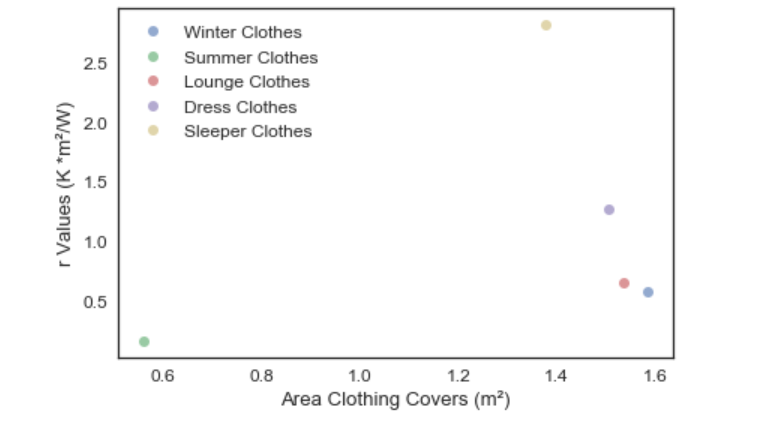

###### Figure 3
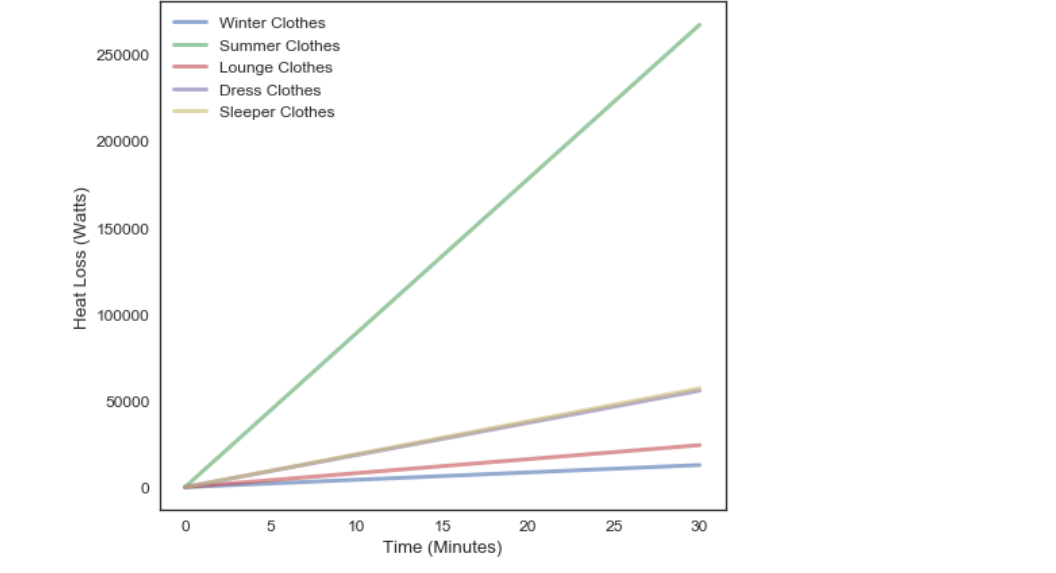